## This notebook aims to analyse the performance of 3 supervised learning algorithms: logistic regression, MLP and XGBoost. It evaluates not only the test accuracy, but metrics such as recall, precision, f-score and specificity based on the confusion matrix of each one.

### Libraries Import

In [74]:
s = 13
import os
os.environ['PYTHONHASHSEED']=str(s)
import random
random.seed(s)
from numpy.random import seed
seed(s)
from tensorflow.random import set_seed
set_seed(s)

import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import xgboost as xgb

### Data analysis

In [ ]:
Xor=pd.read_csv('X.csv', decimal=',') #.csv data
Yor=pd.read_csv('Y.csv') #.csv data
X=np.asarray(Xor).T[1:,:].astype(float) #matrix X
Y=np.asarray(Yor).T

#over sampling data
sm = SMOTE()
X, y = sm.fit_sample(X.T, Y.T)

#division - 30% for test set
x_train, x_test, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=s)
y_train, y_test = to_categorical(y_train1), to_categorical(y_test1)

In [241]:
Yor.value_counts()

FORMADO NO CURSO
0                   341
1                    32
dtype: int64

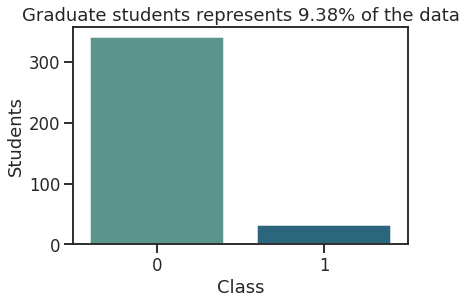

In [257]:
### before SMOTE ###
sns.set_context("talk")
ax = sns.countplot(x=Y.squeeze(), palette="crest")
ax.set(xlabel='Class', ylabel='Students')
ax.set_title('Graduate students represents %.2f%% of the data' %((32/341)*100))
plt.show()

In [252]:
np.bincount(y)

array([341, 341])

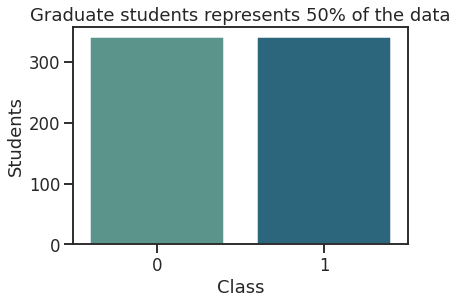

In [256]:
### after SMOTE ###
ax = sns.countplot(x=y, palette="crest")
ax.set(xlabel='Class', ylabel='Students')
ax.set_title('Graduate students represents 50% of the data')
plt.show()

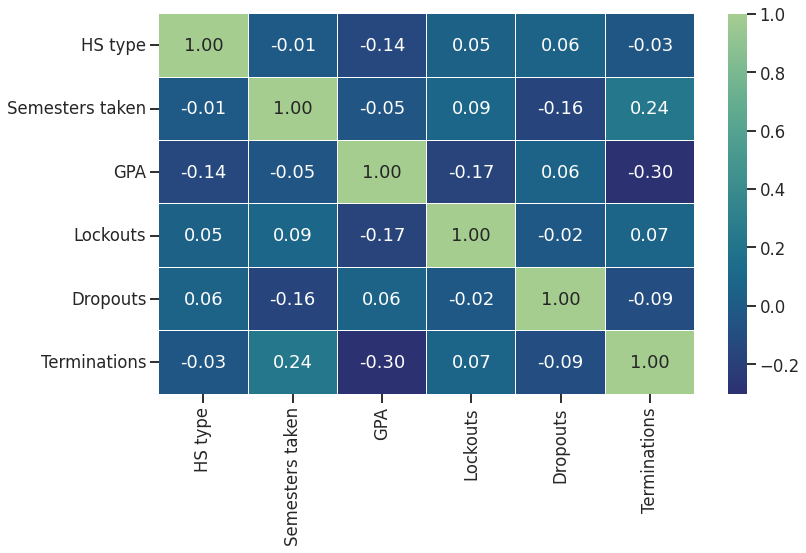

In [258]:
### correlation matrix ###
plt.figure(figsize = (12,7))
corr = Xor.corr()
labels = ['HS type','Semesters taken','GPA','Lockouts', 'Dropouts', 'Terminations']
sns.heatmap(corr, cmap='crest_r', linewidths=.1, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.show()

### Logistic Regression

In [259]:
### logistic regression ###

lr = LogisticRegression()
lr.fit(x_train, y_train1)
y_pred = lr.predict(x_test)

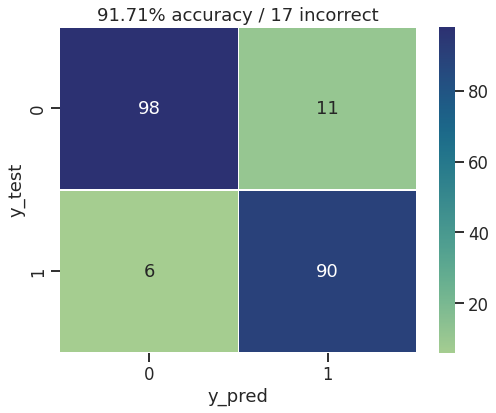

In [260]:
### confusion matrix ###

plt.figure(figsize = (8,6))
cm = confusion_matrix(y_test1, y_pred)
acc = np.trace(cm)/x_test.shape[0] * 100
erros = tf.reduce_sum(cm)-tf.linalg.trace(cm)
plt.title('%.2f%% accuracy / %d incorrect' % (acc, erros))
sns.heatmap(cm, cmap='crest', linewidths=.3, annot=True, fmt='d')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [261]:
### metrics ###
tp, tn, fp, fn = cm[1][1], cm[0][0], cm[0][1], cm[1][0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
m=1.0
fm = ((m+1)*recall*precision)/(recall+(m*precision))
error = (fp+fn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
t_fn = fn/(tp+fn)
t_fp = fp/(tn+fp)

print('Accuracy: %.2f%%' %(accuracy*100))
print('Precision: %.2f%%' %(precision*100))
print('Recall: %.2f%%' %(recall*100))
print('F1-score: %.2f%%' %(fm*100))
print('Error rate: %.2f%%' %(error*100))
print('Specificity: %.2f%%' %(specificity*100))
print('False negative rate: %.2f%%' %(t_fn*100))
print('False positive rate: %.2f%%' %(t_fp*100))

Accuracy: 91.71%
Precision: 89.11%
Recall: 93.75%
F1-score: 91.37%
Error rate: 8.29%
Specificity: 89.91%
False negative rate: 6.25%
False positive rate: 10.09%


### MLP

In [262]:
### fully connected ###
tf.random.set_seed(11) #11

model = keras.Sequential([
    keras.layers.Dense(6, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(2)])

### inverse time decay  ###
inversetime_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate = 0.001, 
  decay_steps = x_train.shape[0]/32,
  decay_rate = 0.01)

optimizer = tf.keras.optimizers.Adam(learning_rate=inversetime_decay)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train, y_train,epochs=500, batch_size=32) #500

Epoch 1/500
15/15 [==============================] - 0s 2ms/step - loss: 1.0799 - accuracy: 0.4864
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9736 - accuracy: 0.4864
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9161 - accuracy: 0.4864
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8753 - accuracy: 0.4864
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.4864
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8152 - accuracy: 0.4864
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7907 - accuracy: 0.4864
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7696 - accuracy: 0.4864
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7511 - accuracy: 0.4864
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.4864
Epoch 11/

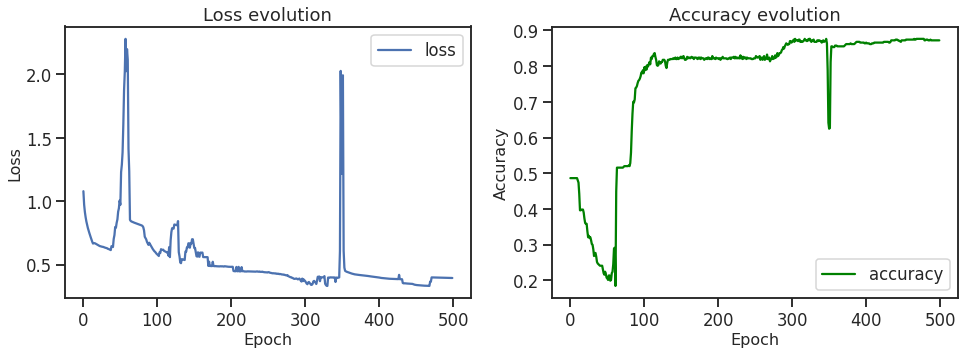

In [263]:
plt.figure(figsize=(16,5))
plt.subplot(121), plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch', fontsize=16), plt.ylabel('Loss', fontsize=16)
plt.title('Loss evolution')
plt.legend()
plt.subplot(122), plt.plot(history.history['accuracy'], label = 'accuracy', color='green')
plt.xlabel('Epoch', fontsize=16), plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy evolution')
plt.legend()
plt.show()

In [264]:
### TEST ACC ###
scores = model.evaluate(x_test, y_test)
print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1] * 100))

7/7 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.9122

accuracy : 91.22%


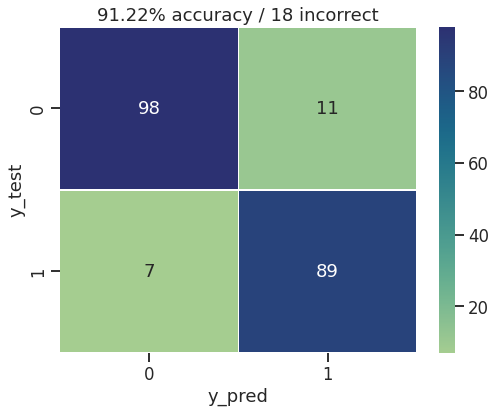

In [265]:
### confusion matrix ###

y_pred = model.predict(x_test)
plt.figure(figsize = (8,6))
cm = confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(y_pred, axis=1))
acc = np.trace(cm)/x_test.shape[0] * 100
erros = tf.reduce_sum(cm)-tf.linalg.trace(cm)
plt.title('%.2f%% accuracy / %d incorrect' % (acc, erros))
sns.heatmap(cm, cmap='crest', linewidths=.3, annot=True, fmt='d')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [266]:
### metrics ###
tp, tn, fp, fn = cm[1][1], cm[0][0], cm[0][1], cm[1][0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
m=1.0
fm = ((m+1)*recall*precision)/(recall+(m*precision))
error = (fp+fn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
t_fn = fn/(tp+fn)
t_fp = fp/(tn+fp)

print('Accuracy: %.2f%%' %(accuracy*100))
print('Precision: %.2f%%' %(precision*100))
print('Recall: %.2f%%' %(recall*100))
print('F1-score: %.2f%%' %(fm*100))
print('Error rate: %.2f%%' %(error*100))
print('Specificity: %.2f%%' %(specificity*100))
print('False negative rate: %.2f%%' %(t_fn*100))
print('False positive rate: %.2f%%' %(t_fp*100))

Accuracy: 91.22%
Precision: 89.00%
Recall: 92.71%
F1-score: 90.82%
Error rate: 8.78%
Specificity: 89.91%
False negative rate: 7.29%
False positive rate: 10.09%


### XGboost

In [267]:
### fully connected ###

# Train
dtrain = xgb.DMatrix(x_train, y_train1)
dtest = xgb.DMatrix(x_test, y_test1)
param = {'max_depth' : 3, 'eta' : 0.3, 'objective' : 'binary:logistic', 'seed' : 42}
num_round = 1000
bst = xgb.train(param, dtrain, num_round, [(dtest, 'test'), (dtrain, 'train')])

[0]	test-error:0.121951	train-error:0.100629
[1]	test-error:0.102439	train-error:0.09434
[2]	test-error:0.102439	train-error:0.09434
[3]	test-error:0.121951	train-error:0.100629
[4]	test-error:0.063415	train-error:0.071279
[5]	test-error:0.058537	train-error:0.069182
[6]	test-error:0.04878	train-error:0.067086
[7]	test-error:0.043902	train-error:0.060797
[8]	test-error:0.043902	train-error:0.060797
[9]	test-error:0.04878	train-error:0.062893
[10]	test-error:0.04878	train-error:0.062893
[11]	test-error:0.04878	train-error:0.062893
[12]	test-error:0.04878	train-error:0.062893
[13]	test-error:0.043902	train-error:0.054507
[14]	test-error:0.039024	train-error:0.054507
[15]	test-error:0.043902	train-error:0.056604
[16]	test-error:0.043902	train-error:0.054507
[17]	test-error:0.034146	train-error:0.054507
[18]	test-error:0.034146	train-error:0.054507
[19]	test-error:0.034146	train-error:0.054507
[20]	test-error:0.034146	train-error:0.046122
[21]	test-error:0.034146	train-error:0.046122
[22]	

In [268]:
preds = bst.predict(dtest)

#set threshold
preds[preds > 0.5] = 1 
preds[preds <= 0.5] = 0

print(accuracy_score(preds, y_test1), 1 - accuracy_score(preds, y_test1))

0.9414634146341463 0.05853658536585371


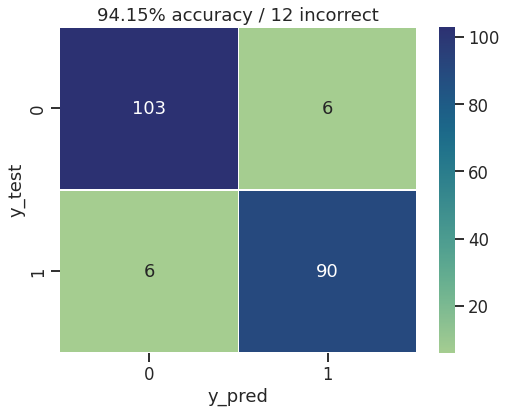

In [269]:
### confusion matrix ###

plt.figure(figsize = (8,6))
cm = confusion_matrix(y_test1, preds)
acc = np.trace(cm)/x_test.shape[0] * 100
erros = tf.reduce_sum(cm)-tf.linalg.trace(cm)
plt.title('%.2f%% accuracy / %d incorrect' % (acc, erros))
sns.heatmap(cm, cmap='crest', linewidths=.3, annot=True, fmt='d')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [270]:
### metrics ###
tp, tn, fp, fn = cm[1][1], cm[0][0], cm[0][1], cm[1][0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
m=1.0
fm = ((m+1)*recall*precision)/(recall+(m*precision))
error = (fp+fn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
t_fn = fn/(tp+fn)
t_fp = fp/(tn+fp)

print('Accuracy: %.2f%%' %(accuracy*100))
print('Precision: %.2f%%' %(precision*100))
print('Recall: %.2f%%' %(recall*100))
print('F1-score: %.2f%%' %(fm*100))
print('Error rate: %.2f%%' %(error*100))
print('Specificity: %.2f%%' %(specificity*100))
print('False negative rate: %.2f%%' %(t_fn*100))
print('False positive rate: %.2f%%' %(t_fp*100))

Accuracy: 94.15%
Precision: 93.75%
Recall: 93.75%
F1-score: 93.75%
Error rate: 5.85%
Specificity: 94.50%
False negative rate: 6.25%
False positive rate: 5.50%
